In [ ]:
pip install paddleocr

In [ ]:
!pip install imgaug==0.2.5

In [ ]:
!pip install paddlepaddle

In [ ]:
!pip install gTTS

In [ ]:
!pip install paddlepaddle
!pip install paddleocr
!pip install gtts
!pip install matplotlib


In [1]:
from paddleocr import PaddleOCR, draw_ocr
from PIL import Image
from gtts import gTTS
import os
import matplotlib.pyplot as plt
import cv2


[2024/07/03 21:23:53] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\NIDARSHAN M V/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\NIDARSHAN M V/.paddleocr/whl\\rec\\en\\en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num

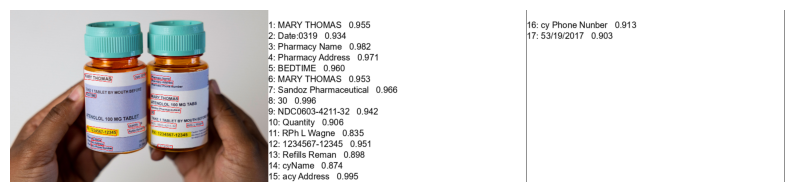

In [4]:
# Initialize PaddleOCR
ocr = PaddleOCR(lang='en')  # need to run only once to download and load model into memory

# Path to the image
img_path = 'Medicine_2.jpg'  # Replace with your image path

# Perform OCR on the image
result = ocr.ocr(img_path, cls=False)

# Extract the recognized text
extracted_text = ' '.join([line[1][0] for line in result[0]])

# Print the extracted text
print("Extracted Text: ", extracted_text)

# Draw OCR results on the image
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in result[0]]
txts = [line[1][0] for line in result[0]]
scores = [line[1][1] for line in result[0]]

# Specify a valid font path
font_path = 'C:/Windows/Fonts/Arial.ttf'  # Adjust this path to a valid font file on your system

if not os.path.exists(font_path):
    raise FileNotFoundError(f"Font file not found: {font_path}")

im_show = draw_ocr(image, boxes, txts, scores, font_path=font_path)
im_show = Image.fromarray(im_show)
im_show.save('result.jpg')

# Display the image with OCR results
plt.figure(figsize=(10, 10))
plt.imshow(im_show)
plt.axis('off')
plt.show()

# Convert text to speech
def text_to_speech(text, output_audio_file):
    tts = gTTS(text=text, lang='en')
    tts.save(output_audio_file)
    os.system(f"start {output_audio_file}")  # For Windows; use "mpg321" for Linux

# Save the audio file
output_audio_file = 'prescription_audio.mp3'
text_to_speech(extracted_text, output_audio_file)


In [5]:
result

[[[[[607.0, 521.0], [831.0, 546.0], [825.0, 592.0], [602.0, 567.0]],
   ('MARY THOMAS', 0.9549534320831299)],
  [[[1004.0, 538.0], [1098.0, 514.0], [1107.0, 547.0], [1012.0, 571.0]],
   ('Date:0319', 0.9340565204620361)],
  [[[1147.0, 530.0], [1305.0, 550.0], [1300.0, 588.0], [1143.0, 567.0]],
   ('Pharmacy Name', 0.9819890260696411)],
  [[[1147.0, 561.0], [1327.0, 583.0], [1322.0, 621.0], [1143.0, 598.0]],
   ('Pharmacy Address', 0.9711155891418457)],
  [[[619.0, 672.0], [704.0, 686.0], [699.0, 721.0], [613.0, 707.0]],
   ('BEDTIME', 0.9602262377738953)],
  [[[1147.0, 686.0], [1371.0, 708.0], [1367.0, 747.0], [1143.0, 725.0]],
   ('MARY THOMAS', 0.9526554346084595)],
  [[[1145.0, 778.0], [1390.0, 802.0], [1386.0, 841.0], [1141.0, 817.0]],
   ('Sandoz Pharmaceutical', 0.9659039378166199)],
  [[[1146.0, 822.0], [1175.0, 822.0], [1175.0, 853.0], [1146.0, 853.0]],
   ('30', 0.9963512420654297)],
  [[[1148.0, 904.0], [1353.0, 930.0], [1349.0, 969.0], [1143.0, 944.0]],
   ('NDC0603-4211-32'

In [6]:
result
for res in result:
    print(res[1][0])

[[1004.0, 538.0], [1098.0, 514.0], [1107.0, 547.0], [1012.0, 571.0]]


In [7]:
boxes = [res[0] for res in result] 
txts = [res[1][0] for res in result]
scores = [res[1][1] for res in result]

In [8]:
txts

[[[1004.0, 538.0], [1098.0, 514.0], [1107.0, 547.0], [1012.0, 571.0]]]

In [9]:
img = cv2.imread(img_path) 


img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

[2024/07/03 21:27:02] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\NIDARSHAN M V/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\NIDARSHAN M V/.paddleocr/whl\\rec\\en\\en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num

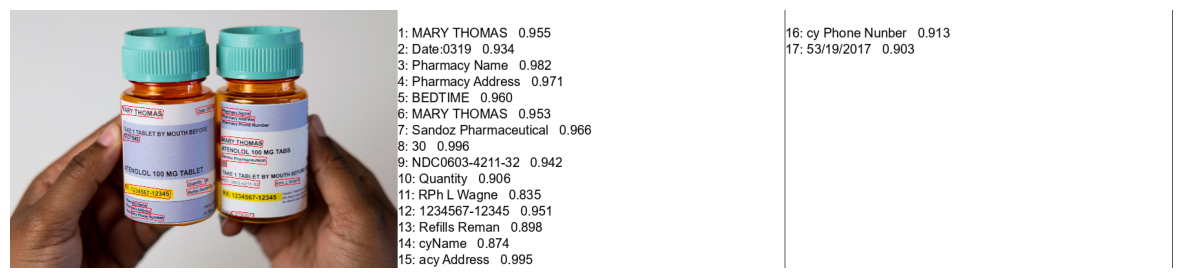

In [11]:
from paddleocr import PaddleOCR, draw_ocr
from PIL import Image
import matplotlib.pyplot as plt

# Initialize PaddleOCR
ocr = PaddleOCR(lang='en')

# Define the image path
img_path = 'Medicine_2.jpg'

# Perform OCR
result = ocr.ocr(img_path, cls=False)

# Extract boxes, text, and scores
boxes = [line[0] for line in result[0]]
txts = [line[1][0] for line in result[0]]
scores = [line[1][1] for line in result[0]]

# Print out scores to debug
print("Scores:", scores)

# Load image
image = Image.open(img_path).convert('RGB')

# Use a common font path, ensure you have this font file in your directory
font_path = 'arial.ttf'  # Replace with the path to your font file

# Draw OCR results on the image
try:
    annotated = draw_ocr(image, boxes, txts, scores, font_path=font_path)
    # Convert the annotated image to a format suitable for display
    annotated_img = Image.fromarray(annotated)

    # Display the annotated image
    plt.figure(figsize=(15, 15))
    plt.imshow(annotated_img)
    plt.axis('off')
    plt.show()

except TypeError as e:
    print("Error occurred while drawing OCR results:", e)


In [12]:
print(txts)

['MARY THOMAS', 'Date:0319', 'Pharmacy Name', 'Pharmacy Address', 'BEDTIME', 'MARY THOMAS', 'Sandoz Pharmaceutical', '30', 'NDC0603-4211-32', 'Quantity', 'RPh L Wagne', '1234567-12345', 'Refills Reman', 'cyName', 'acy Address', 'cy Phone Nunber', '53/19/2017']


In [13]:
my_texts =' '.join(txts)
my_texts

'MARY THOMAS Date:0319 Pharmacy Name Pharmacy Address BEDTIME MARY THOMAS Sandoz Pharmaceutical 30 NDC0603-4211-32 Quantity RPh L Wagne 1234567-12345 Refills Reman cyName acy Address cy Phone Nunber 53/19/2017'

In [14]:
f=open("output.txt","w")
f.write(my_texts)

208

In [15]:
from gtts import gTTS

In [16]:
f=open("output.txt","r")
tts=f.read()
tt= gTTS(text=tts,lang='en',slow = False)
tt.save("good.mp3")

In [17]:
%pip install gradio

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 3.7.4 requires typer<0.10.0,>=0.3.0, but you have typer 0.12.3 which is incompatible.
tensorflow-intel 2.15.0 requires ml-dtypes~=0.2.0, but you have ml-dtypes 0.3.2 which is incompatible.
tensorflow-intel 2.15.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.
tf-nightly-intel 2.17.0.dev20240502 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.
weasel 0.3.4 requires typer<0.10.0,>=0.3.0, but you have typer 0.12.3 which is incompatible.

[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/51.6 kB ? eta -:--:--
     ---------------------------------------- 0.0/51.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/51.6 kB ? eta -:--:--
     ---------------------- --------------- 30.7/51.6 kB 262.6 kB/s eta 0:00:01
     ---------------------- --------------- 30.7/51.6 kB 262.6 kB/s eta 0:00:01
     -------------------------------------- 51.6/51.6 kB 240.8 kB/s eta 0:00:00
   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.3 MB 640.0 kB/s eta 0:00:20
   ---------------------------------------- 0.0/12.3 MB 640.0 kB/s eta 0:00:20
   ---------------------------------------- 0.0/12.3 MB 279.3 kB/s eta 0:00:44
   ---------------------------------------- 0.1/12.3 MB 363.1 k

In [18]:
import gradio as gr

In [19]:
import pickle

In [20]:
file = open('model.pkl', 'wb')

pickle.dump(tt, file)

In [21]:
%pip install pdfminer.six


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
%pip install gradio PyMuPDF pytesseract Pillow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
from gtts import gTTS
from pdfminer.high_level import extract_text
import gradio as gr

def pdf_to_text(file_obj):
   text = extract_text(file_obj.name)
   myobj = gTTS(text=tts, lang='en', slow=False)
   myobj.save("output.wav")
   return 'output.wav'

iface = gr.Interface(
   fn = pdf_to_text,
   inputs = 'file',
   outputs = 'audio'
   )
iface.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


Traceback (most recent call last):
  File "c:\Users\NIDARSHAN M V\AppData\Local\Programs\Python\Python39\lib\site-packages\gradio\queueing.py", line 541, in process_events
    response = await route_utils.call_process_api(
  File "c:\Users\NIDARSHAN M V\AppData\Local\Programs\Python\Python39\lib\site-packages\gradio\route_utils.py", line 276, in call_process_api
    output = await app.get_blocks().process_api(
  File "c:\Users\NIDARSHAN M V\AppData\Local\Programs\Python\Python39\lib\site-packages\gradio\blocks.py", line 1928, in process_api
    result = await self.call_function(
  File "c:\Users\NIDARSHAN M V\AppData\Local\Programs\Python\Python39\lib\site-packages\gradio\blocks.py", line 1514, in call_function
    prediction = await anyio.to_thread.run_sync(
  File "c:\Users\NIDARSHAN M V\AppData\Local\Programs\Python\Python39\lib\site-packages\anyio\to_thread.py", line 56, in run_sync
    return await get_async_backend().run_sync_in_worker_thread(
  File "c:\Users\NIDARSHAN M V\AppDa